/tmp/ipykernel_88836/3812432034.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


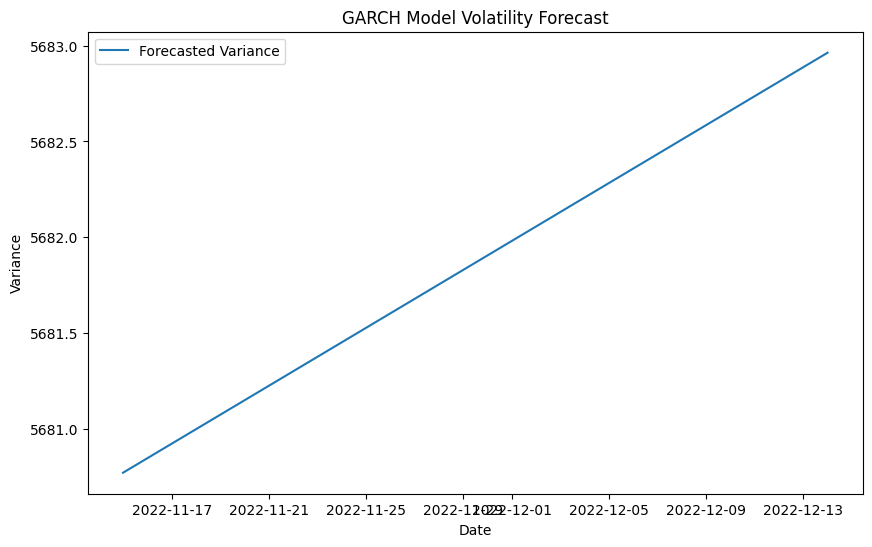

In [11]:
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

# Load processed data
data = pd.read_csv('../../Inputs/data/processed_data/brent_oil_prices.csv')
data['Date'] = pd.to_datetime(data['Date'])

# Fit GARCH model
model = arch_model(data['Price'], vol='Garch', p=1, q=1)
garch_result = model.fit(disp='off')

# Forecast volatility
forecast_horizon = 30
volatility_forecast = garch_result.forecast(horizon=forecast_horizon)

# Extract forecasted variance and dates
forecasted_variance = volatility_forecast.variance.values[-1]  # Last forecasted variance
forecast_dates = pd.date_range(start=data['Date'].iloc[-1], periods=forecast_horizon + 1, freq=data['Date'].iloc[1] - data['Date'].iloc[0])

# Plot volatility forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast_dates[1:], forecasted_variance, label='Forecasted Variance')
plt.title('GARCH Model Volatility Forecast')
plt.xlabel('Date')
plt.ylabel('Variance')
plt.legend()
plt.show()

# Save results to CSV
forecast_df = pd.DataFrame({'Date': forecast_dates[1:], 'Forecasted_Variance': forecasted_variance})
forecast_df.to_csv('../Results/garch/forecast.csv', index=False)


/home/yadasa/Desktop/Oil_Price_Impact/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/home/yadasa/Desktop/Oil_Price_Impact/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/yadasa/Desktop/Oil_Price_Impact/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/varmax.py:373: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           46     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.71998D+01    |proj g|=  1.88063D+02

At iterate    5    f=  2.84218D+01    |proj g|=  2.50011D+01

At iterate   10    f=  2.66388D+01    |proj g|=  1.68885D+01

At iterate   15    f=  2.21893D+01    |proj g|=  3.53280D+01

At iterate   20    f=  2.00644D+01    |proj g|=  1.97620D+01

At iterate   25    f=  1.88182D+01    |proj g|=  2.02136D+01

At iterate   30    f=  1.76883D+01    |proj g|=  3.66594D+00

At iterate   35    f=  1.70369D+01    |proj g|=  4.77354D+00

At iterate   40    f=  1.65537D+01    |proj g|=  3.18543D+00

At iterate   45    f=  1.64521D+01    |proj g|=  6.91252D+00

At iterate   50    f=  1.61492D+01    |proj g|=  3.06954D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/yadasa/Desktop/Oil_Price_Impact/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/yadasa/Desktop/Oil_Price_Impact/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/yadasa/Desktop/Oil_Price_Impact/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


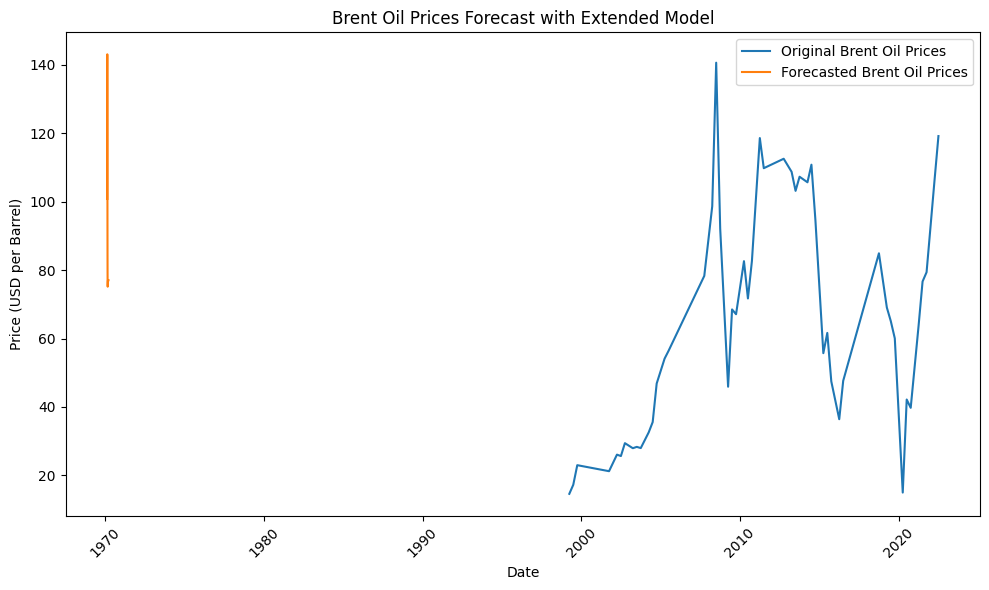

Extended model forecast completed and saved to Results/extended_model/forecasted_prices.csv


In [1]:
import pandas as pd
from statsmodels.tsa.statespace.varmax import VARMAX

# Load the datasets
brent_prices = pd.read_csv('../Inputs/data/processed_data/preprocessed_brent_prices_data.csv', index_col='Date', parse_dates=True)
gdp = pd.read_csv('../Inputs/data/raw_data/gdp.csv', index_col='DATE', parse_dates=True)
inflation = pd.read_csv('../Inputs/data/raw_data/inflation.csv', index_col='DATE', parse_dates=True)
exchange_rate = pd.read_csv('../Inputs/data/raw_data/exchange_rate.csv', index_col='DATE', parse_dates=True)

# Merge the datasets
data = brent_prices.join([gdp, inflation, exchange_rate], how='inner').dropna()

# Rename columns for clarity
data.columns = ['Brent_Oil_Price', 'GDP', 'Inflation', 'Exchange_Rate']

# Fit the VARMAX model
model = VARMAX(data, order=(1, 1))
results = model.fit()

# Forecast the prices
forecast = results.get_forecast(steps=30)
forecast_df = forecast.predicted_mean

# Plot the original and forecasted prices
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Brent_Oil_Price'], label='Original Brent Oil Prices')
plt.plot(forecast_df.index, forecast_df['Brent_Oil_Price'], label='Forecasted Brent Oil Prices')
plt.title('Brent Oil Prices Forecast with Extended Model')
plt.xlabel('Date')
plt.ylabel('Price (USD per Barrel)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Save the forecast to CSV
forecast_df.to_csv('../Results/extended_model/forecasted_prices.csv')
print("Extended model forecast completed and saved to Results/extended_model/forecasted_prices.csv")
